In [2]:
import qiskit

In [3]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.1',
 'qiskit-aqua': '0.6.6',
 'qiskit': '0.18.3'}

In [4]:
from qiskit import IBMQ

In [5]:
IBMQ.save_account("",overwrite=True)

In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# 1. Hello World Application

In [6]:
from qiskit import *

In [7]:
qr=QuantumRegister(2)

In [8]:
cr=ClassicalRegister(2)

In [9]:
circuit=QuantumCircuit(qr,cr)

In [10]:
%matplotlib inline

In [11]:
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

In [12]:
circuit.h(qr[0])

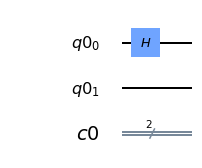

In [13]:
circuit.draw(output='mpl')

In [14]:
circuit.cx(qr[0],qr[1])

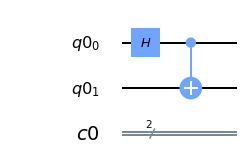

In [15]:
circuit.draw(output='mpl')

In [16]:
circuit.measure(qr,cr)

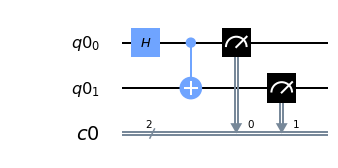

In [17]:
circuit.draw(output='mpl')

In [18]:
simulator = Aer.get_backend("qasm_simulator")

In [19]:
result = execute(circuit,backend=simulator).result()

In [20]:
from qiskit.tools.visualization import plot_histogram

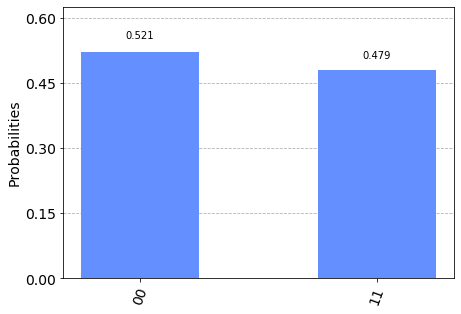

In [21]:
plot_histogram(result.get_counts(circuit))

In [25]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider("ibm-q")

In [27]:
qcomp=provider.get_backend("ibmq_16_melbourne")

In [28]:
job=execute(circuit,backend=qcomp)

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

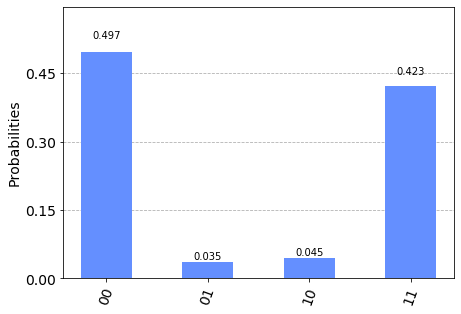

In [32]:
plot_histogram(result.get_counts(circuit))

# 2. Quantum Circuits

In [22]:
from qiskit.tools.visualization import plot_bloch_multivector

### 2.1 X gate

In [24]:
circuit= QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator).result()
statevector= result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


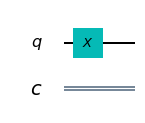

In [25]:
circuit.draw(output="mpl")

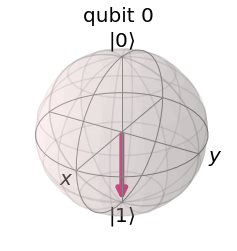

In [26]:
plot_bloch_multivector(statevector)

In [27]:
circuit.measure([0],[0])
backend = Aer.get_backend("qasm_simulator")
result= execute(circuit, backend=backend, shots=1024).result()
counts=result.get_counts()

In [28]:
from qiskit.tools.visualization import plot_histogram

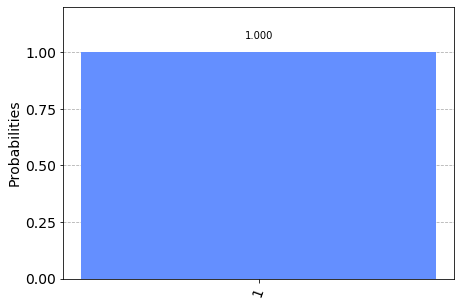

In [29]:
plot_histogram(counts)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


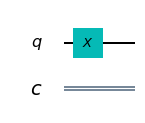

In [30]:
circuit= QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend("unitary_simulator")
result = execute(circuit, backend=simulator).result()
unitary= result.get_unitary()
print(unitary)
circuit.draw(output="mpl")

### 2.2 H gate

In [33]:
circuit= QuantumCircuit(1,1)
circuit.h(0)
simulator=Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator).result()
statevector= result.get_statevector()
print(statevector)

[0.70710678+0.j 0.70710678+0.j]


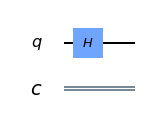

In [36]:
circuit.draw(output="mpl")

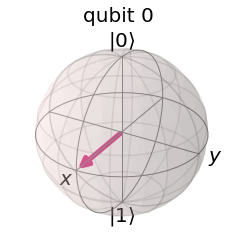

In [35]:
plot_bloch_multivector(statevector)

### 2.3 Y gate

In [37]:
circuit.y(0)
simulator=Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator).result()
statevector= result.get_statevector()
print(statevector)

[0.-0.70710678j 0.+0.70710678j]


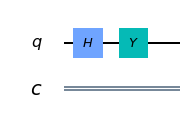

In [38]:
circuit.draw(output="mpl")

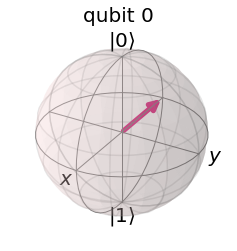

In [39]:
plot_bloch_multivector(statevector)

### 2.4 Cx and Z gates 

Controlled gates act on 2 or more qubits, where one or more qubits act as a control for some operation. The controlled NOT gate (or CNOT or cX) acts on 2 qubits, and performs the NOT operation on the second qubit only when the first qubit is 1, and otherwise leaves it unchanged. 

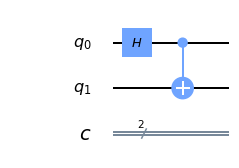

In [64]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output="mpl")

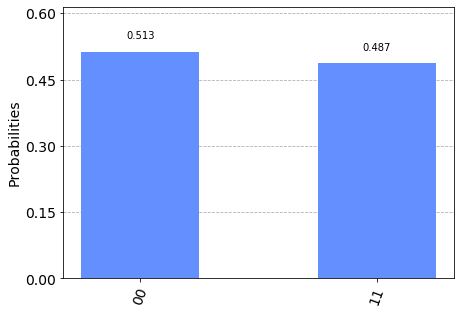

In [65]:
circuit.measure([0,1],[0,1])
backend = Aer.get_backend("qasm_simulator")
result= execute(circuit, backend=backend, shots=1024).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

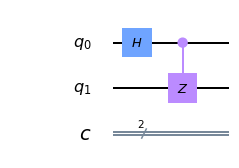

In [63]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cz(0,1)
circuit.draw(output="mpl")

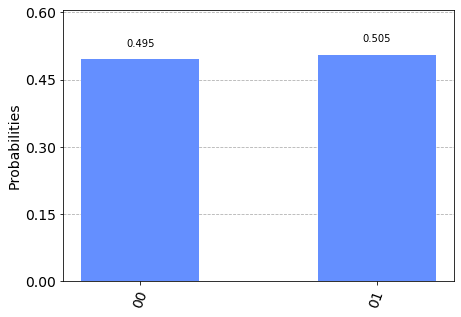

In [55]:
circuit.measure([0,1],[0,1])
backend = Aer.get_backend("qasm_simulator")
result= execute(circuit, backend=backend, shots=1024).result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [72]:
simulator=Aer.get_backend("statevector_simulator")
result = execute(circuit, backend=simulator).result()
statevector= result.get_statevector()
print(statevector)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
